# FLIGHT ANALYSIS

Email : abdikaalbiyan@gmail.com

# 1. Load Data

Plus Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
pd.set_option('float_format', '{:f}'.format)
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/mnt/c/Belajar/Data/Dataset.csv")

df = pd.DataFrame(data)

# 2. Cleansing Data

1. Add `Date` column. Merge `DayofMonth`, `Month`, and `Year` then convert it to Datetime format.
2. Formatting `DepTime` to Time format.
3. Formatting `CRSDepTime` to time format.
4. Formatting `ArrTime` to Time format.
5. Formatting `CRSArrTime` to time format.

In [2]:
#Cleaning and formatting time columns

df[['DayofMonth', 'Month', 'Year']] = df[['DayofMonth', 'Month', 'Year']].astype(str)
df['Date'] = df['DayofMonth'] + ':' + df['Month'] + ':' + df['Year']
df['Date'] = pd.to_datetime(df['Date'], format="%d:%m:%Y")

df['DepTime'] = df.DepTime[~df.DepTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['DepTime'] = pd.to_timedelta(df.DepTime.str[:2]+':'+df.DepTime.str[2:]+':00')

df['CRSDepTime'] = df.CRSDepTime[~df.CRSDepTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['CRSDepTime'] = pd.to_timedelta(df.CRSDepTime.str[:2]+':'+df.CRSDepTime.str[2:]+':00')

df['ArrTime'] = df.ArrTime[~df.ArrTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['ArrTime'] = pd.to_timedelta(df.ArrTime.str[:2]+':'+df.ArrTime.str[2:]+':00')

df['CRSArrTime'] = df.CRSArrTime[~df.CRSArrTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['CRSArrTime'] = pd.to_timedelta(df.CRSArrTime.str[:2]+':'+df.CRSArrTime.str[2:]+':00')

df[['DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime']] = df[['DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime']]\
                                                          .apply(lambda x: pd.to_timedelta(x))

df['CarrierDelay'] = df['CarrierDelay'].fillna(0).astype('int')
df['WeatherDelay'] = df['WeatherDelay'].fillna(0).astype('int')
df['NASDelay'] = df['NASDelay'].fillna(0).astype('int')
df['SecurityDelay'] = df['SecurityDelay'].fillna(0).astype('int')
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0).astype('int')


In [3]:
display((df.head(2)))
print(df.info())

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,...,8.000000,0,NaN,0,0,0,0,0,0,2008-01-03
1,2008,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,...,10.000000,0,NaN,0,0,0,0,0,0,2008-01-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 object
Month                object
DayofMonth           object
DayOfWeek            int64
DepTime              timedelta64[ns]
CRSDepTime           timedelta64[ns]
ArrTime              timedelta64[ns]
CRSArrTime           timedelta64[ns]
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
Date                 datetime64[ns]
dtypes

# 3. Explore Data

## 3.1 Canceled Flight Analysis

Pada tahap ini, saya akan menganalisa penerbangan yg dibatalkan.
Analisa meliputi:


A. Frequency masing-masing penyebab flight cancel(Overall).

B. Frequency cancel tiap Origin, meliputi All Frequency dan Frequency by Month. 

### Frequency masing-masing penyebab flight cancel(Overall)

CancellationCode
Carrier     54330
NAS         28188
Security       12
Weather     54904
Name: CancellationCode, dtype: int64

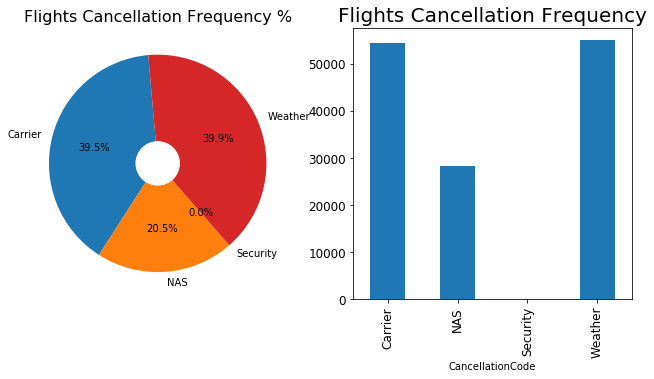

None

In [4]:
flight_cancelled = df[df['Cancelled'] == 1]
flight_cancelled['CancellationCode'] = flight_cancelled['CancellationCode'].replace({'A':'Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'})

flight_cancelled_qty = flight_cancelled.groupby(['CancellationCode'])['CancellationCode'].count()
flight_cancelled_qty


fig = plt.figure(figsize=[11, 11])
ax = fig.add_subplot(221)
ax.pie(flight_cancelled_qty, labeldistance=1.1, labels=flight_cancelled_qty.index, startangle=95, autopct='%1.1f%%')
ax.set_title("Flights Cancellation Frequency %", fontsize=16);
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights Cancellation Frequency", fontsize=20);
ax2.set_facecolor('white')
flight_cancelled_qty.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)

display(flight_cancelled_qty)
display(plt.show())

### Frequency masing-masing penyebab flight cancel(Overall by Date)

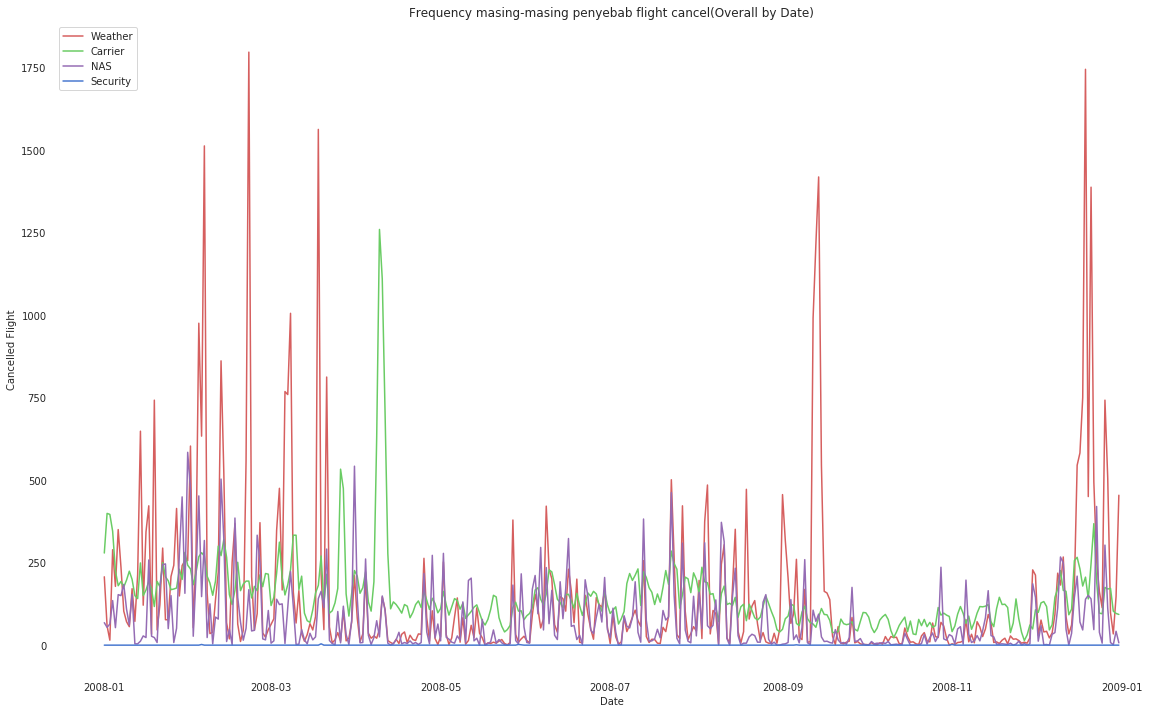

In [5]:

total_cancel_by_month = flight_cancelled.groupby(['Date', 'CancellationCode'])['Date'].count().unstack().fillna(0)
total_cancel_by_month['TotalCancel'] = total_cancel_by_month['Carrier'] + \
                                       total_cancel_by_month['NAS'] + \
                                       total_cancel_by_month['Security']  + \
                                       total_cancel_by_month['Weather']

sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 12))


# # Plot the total
# sns.set_color_codes("pastel")
# sns.lineplot(x=total_cancel_by_month.index.tolist(),
#             y=total_cancel_by_month['TotalCancel'],
#             data=total_cancel_by_month,
#             label="Total",
#             color="y")

# Plot the Weather
sns.set_color_codes("muted")
sns.lineplot(x=total_cancel_by_month.index.tolist(),
            y=total_cancel_by_month['Weather'],
            data=total_cancel_by_month,
            label="Weather",
            color="r")

# Plot the Carrier
sns.set_color_codes("muted")
sns.lineplot(x=total_cancel_by_month.index.tolist(),
            y=total_cancel_by_month['Carrier'],
            data=total_cancel_by_month,
            label="Carrier",
            color="g")

# Plot the NAS
sns.set_color_codes("muted")
sns.lineplot(x=total_cancel_by_month.index.tolist(),
            y=total_cancel_by_month['NAS'],
            data=total_cancel_by_month,
            label="NAS",
            color="m")

# Plot the Security
sns.set_color_codes("muted")
sns.lineplot(x=total_cancel_by_month.index.tolist(),
            y=total_cancel_by_month['Security'],
            data=total_cancel_by_month,
            label="Security",
            color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlabel='Date', ylabel='Cancelled Flight', title='Frequency masing-masing penyebab flight cancel(Overall by Date)')
sns.despine(left=True, bottom=True)

### B. Analisa Cancellation Flight hanya di Origin dan tanggal tertentu

#### Cancellation Flight Frequency by Origin

In [6]:
def cancel_frequency_origin(origin_dept, start_date, end_date):
    
    flight_cancelled = df[df['Cancelled'] == 1]
    flight_cancelled['CancellationCode'] = flight_cancelled['CancellationCode']\
                                            .replace({'A':'Carrier',
                                                      'B':'Weather',
                                                      'C':'NAS',
                                                      'D':'Security'
                                                     })
    
    date_range = pd.date_range(start_date, end_date)
    
    flight_cancelled = flight_cancelled[flight_cancelled['Date'].isin(date_range)]
        
    flight_cancelled_origin_n_reason = flight_cancelled[['Origin', 'CancellationCode']]
        
    origin_cancelled_flight = flight_cancelled_origin_n_reason[flight_cancelled_origin_n_reason['Origin'] == origin_dept]
    origin_cancelled_flight_qty = origin_cancelled_flight.groupby(['CancellationCode'])['CancellationCode'].count()

    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(221)
    ax.pie(origin_cancelled_flight_qty,
           labeldistance=1.1,
           labels=origin_cancelled_flight_qty.index,
           startangle=95,
           autopct='%1.1f%%'
          )
    plt.gcf().gca().add_artist(plt.Circle((0,0), 0.2, color='white'))

    ax2 = fig.add_subplot(222)
    ax2.set_title("Cancelled Frequency from {0} on {1} until {2} per Cancellation Reason"\
                  .format(origin_dept, start_date, end_date), \
                  fontsize=18
                 );
    ax2.set_facecolor('white')
    origin_cancelled_flight_qty.plot(kind='bar',
                                     ax=ax2,
                                     legend=True,
                                     fontsize=17)
    
    flight_cancelled['Date'] = flight_cancelled['Date'].astype('datetime64[ns]')
    cancelled_flight_by_filter = flight_cancelled.groupby(['Date'])['Date'].count()
    
    fig_line = plt.figure(figsize=[15, 5])
    ax3 = fig_line.add_subplot(111)
    ax3.set_facecolor('white')
    ax3.set_title("Cancelled Flight Frequency from {0} on {1} until {2} (Time Series)"\
                  .format(origin_dept, start_date, end_date), \
                  fontsize=18
                 );
    cancelled_flight_by_filter.plot(ax=ax3,
                                    legend=False,
                                    fontsize=18)
    
    
    return plt.show()

Input Origin dan range tanggal yg akan dianalisa

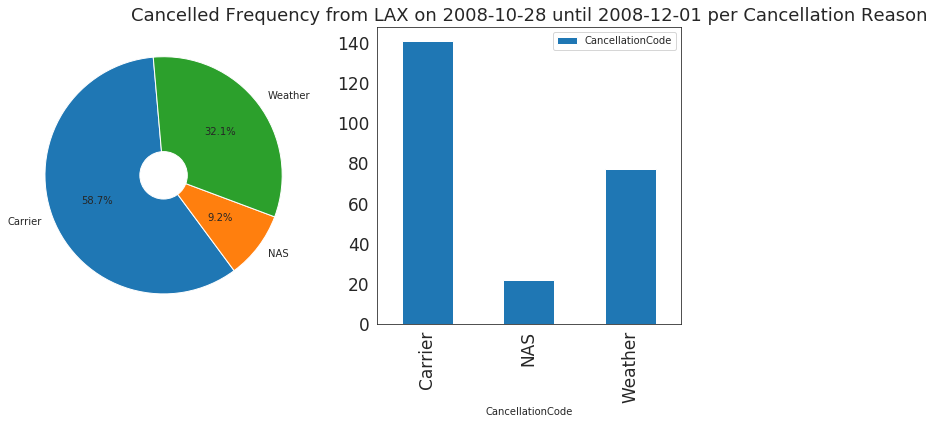

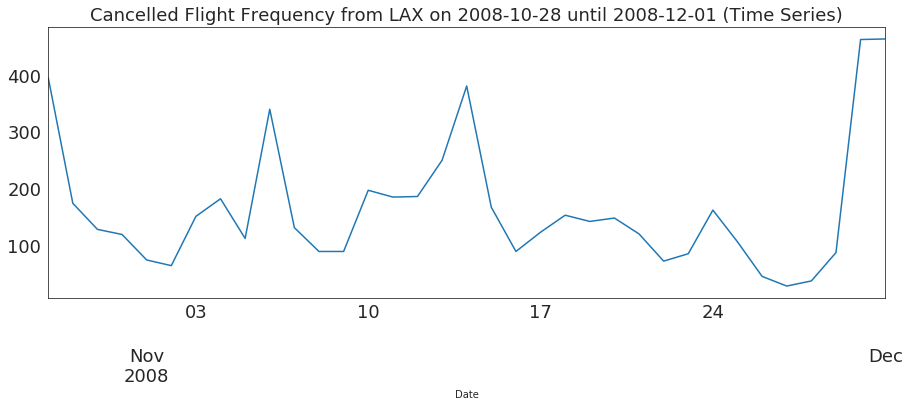

In [7]:
cancel_frequency_origin('LAX','2008-10-28', '2008-12-01')

## 3.2 Success Flight Analysis


Pada tahap ini, saya akan menganalisa penerbangan yg Sukses.
Analisa meliputi:

A. Frequency Overall.

B. Top 5 Flight Origin by Dept Frequency

C. Frequency Flight di Origin yg dipilih, meliputi All Frequency dan Frequency by Month.

### Frequency Overall.

<Figure size 864x864 with 0 Axes>

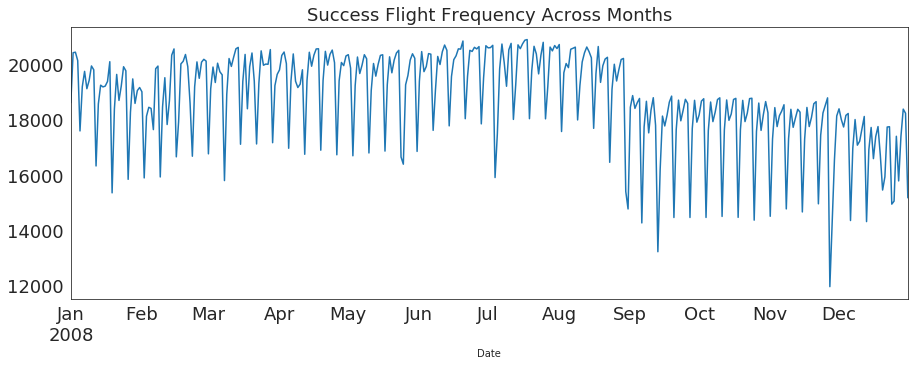

In [8]:
flight_success = df[df['Cancelled'] == 0]

flight_success['Date'] = flight_success['Date'].astype('datetime64[ns]')
success_flight_by_filter = flight_success.groupby(['Date'])['Date'].count()

fig = plt.figure(figsize=[12, 12])

fig_line = plt.figure(figsize=[15, 5])
ax3 = fig_line.add_subplot(111)
ax3.set_facecolor('white')
ax3.set_title("Success Flight Frequency Across Months", \
              fontsize=18
             );
success_flight_by_filter.plot(ax=ax3,
                                legend=False,
                                fontsize=18)


plt.show()

In [9]:
flight_success.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,...,8.000000,0,NaN,0,0,0,0,0,0,2008-01-03
1,2008,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,...,10.000000,0,NaN,0,0,0,0,0,0,2008-01-03


In [10]:
flight_success['Success'] = flight_success['Cancelled'] + 1

flight_success['DayOfWeek'] = flight_success['DayOfWeek']\
                                            .replace({1:'1 Monday',
                                                      2:'2 Tuesday',
                                                      3:'3 Wednesday',
                                                      4:'4 Thursday',
                                                      5:'5 Friday',
                                                      6:'6 Saturday',
                                                      7:'7 Sunday',
                                                     })

# flight_success['OnlyMonth'] = flight_success['Date']

b = flight_success.groupby(['DayOfWeek', flight_success['Date'].dt.month])['Success'].aggregate('sum').unstack()

display(b.sort_values(by='DayOfWeek', ascending=True))


Date,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
1 Monday,78190,78156,100709,81442,79919,102207,82806,80854,92756,74734,73581,90334
2 Tuesday,94305,75923,77717,99156,78620,80595,102195,79133,90137,71531,71817,87752
3 Wednesday,97435,76848,80314,100591,80368,81639,101002,81024,73325,91181,73168,82568
4 Thursday,98950,80363,80796,80890,101926,82285,103099,81496,74861,93652,67305,68717
5 Friday,79891,98329,80252,80541,101250,82449,78446,102158,74087,93447,69815,70539
6 Saturday,65194,65235,84061,67420,83956,71353,71649,85209,56491,57874,75542,59985
7 Sunday,74492,73786,96058,77731,74025,97206,78136,92570,69338,70537,87586,67284


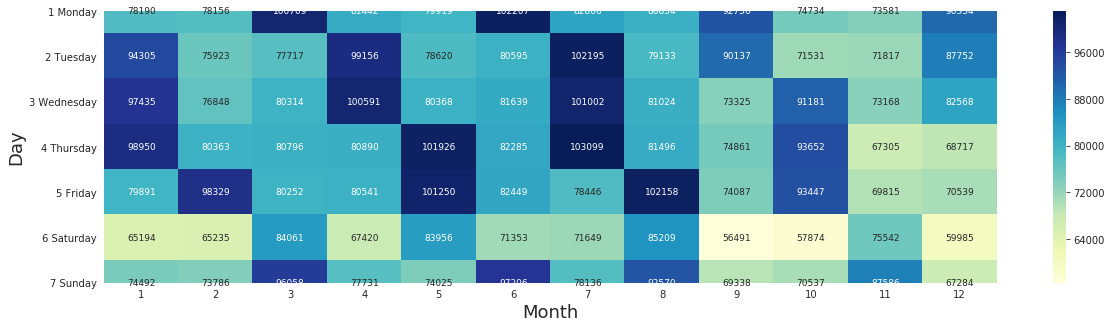

In [11]:
fig = plt.figure(figsize=[20, 5])
sns.heatmap(b, annot=True, fmt="d", cmap='YlGnBu', annot_kws={"size": 9})
plt.xlabel('Month', fontsize=18)
plt.ylabel('Day', fontsize=18)
plt.show()

### Top 5 Flight Frequency by Origin Dept

In [12]:
def top_flight_per_origin(start_date, end_date):
    
    flight_success = df[df['Cancelled'] == 0]
    date_range = pd.date_range(start_date, end_date)
    
    if start_date and end_date is not None:
        flight_success = flight_success[flight_success['Date'].isin(date_range)]
    else:
        flight_success = flight_success
        
    flight_success_count = flight_success.groupby(['Origin'])['Origin'].count().nlargest(5)
    
    fig = plt.figure(figsize=[18, 18])
    
    ax2 = fig.add_subplot(222)
    ax2.set_title("Top 5 Origin Flights frequency", fontsize=20);
    ax2.set_facecolor('white')
    plt.xlabel('Frequency')
    flight_success_count.sort_values()\
                        .plot(kind='barh',
                              ax=ax2,
                              legend=False,
                              fontsize=12
                             )
    
    return display(flight_success_count, plt.show())

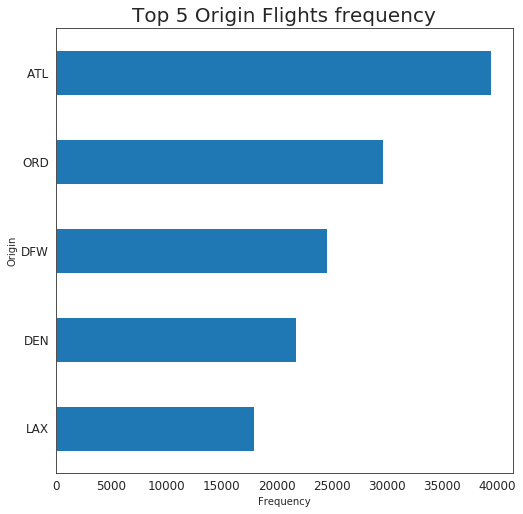

Origin
ATL    39423
ORD    29639
DFW    24529
DEN    21713
LAX    17907
Name: Origin, dtype: int64

None

In [13]:
top_flight_per_origin('2008-10-28', '2008-12-01')

### Selected Flight Frequency

In [14]:
def flight_success_frequency(origin_dept, start_date, end_date):
    
    flight_success = df[df['Cancelled'] == 0]
    
    date_range = pd.date_range(start_date, end_date)
    
    if origin_dept is not None:
        flight_success = flight_success[flight_success['Origin'] == origin_dept]
    else:
        flight_success = flight_success
        
    if start_date and end_date is not None:
        flight_success = flight_success[flight_success['Date'].isin(date_range)]
    else:
        flight_success = flight_success
        

    flight_success['Date'] = flight_success['Date'].astype('datetime64[ns]')
    success_flight_by_filter = flight_success.groupby(['Date'])['Date'].count()
    
    fig_line = plt.figure(figsize=[15, 5])
    ax3 = fig_line.add_subplot(111)
    ax3.set_facecolor('white')
    ax3.set_title("Flight Frequency from {0} on {1} until {2}".format(origin_dept, start_date, end_date), fontsize=18);
    success_flight_by_filter.plot(ax=ax3,  legend=False, fontsize=18)
    
    return plt.show()

Flight Frequency by Origin per Date Range

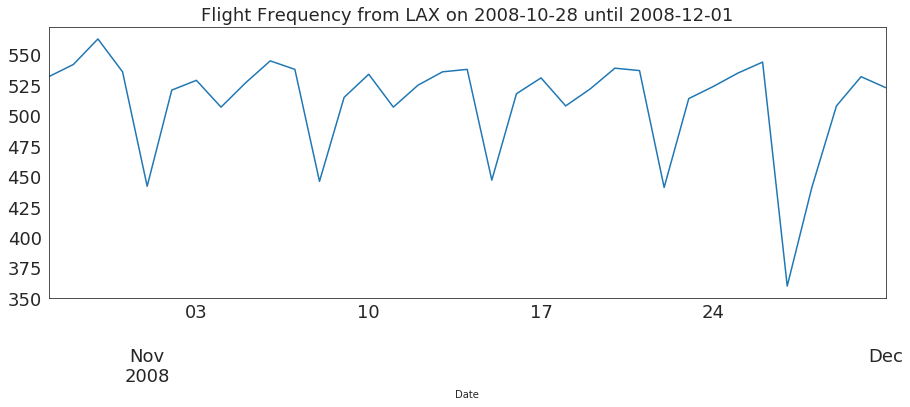

In [15]:
flight_success_frequency('LAX', '2008-10-28', '2008-12-01')

## 3.3 Delayed Flight Analisis

### Dep Delay

Bandara paling sering Delay

Origin
ACK   29.854415
PUB   27.000000
CEC   24.186207
PIR   22.800000
SPI   22.321973
Name: DepDelay, dtype: float64

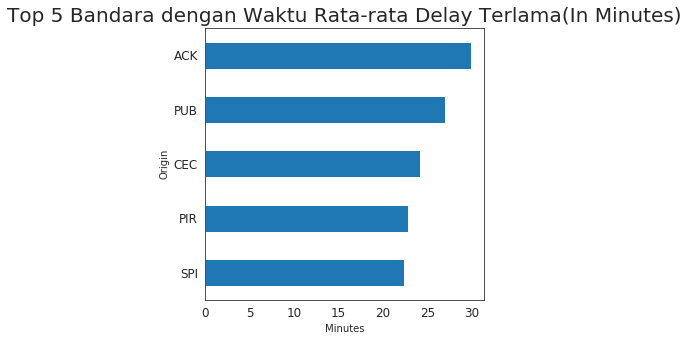

In [16]:
DepDelay = flight_success.groupby(['Origin'])['DepDelay'].mean().nlargest(5)
display(DepDelay)

fig = plt.figure(figsize=[11, 11])
    
ax2 = fig.add_subplot(222)
ax2.set_title("Top 5 Bandara dengan Waktu Rata-rata Delay Terlama(In Minutes)", fontsize=20);
ax2.set_facecolor('white')
plt.xlabel('Minutes')
DepDelay.sort_values()\
        .plot(kind='barh',
              ax=ax2,
              legend=False,
              fontsize=12,
             )


### Rata-rata waktu masing-masing Kategori Delay by Date

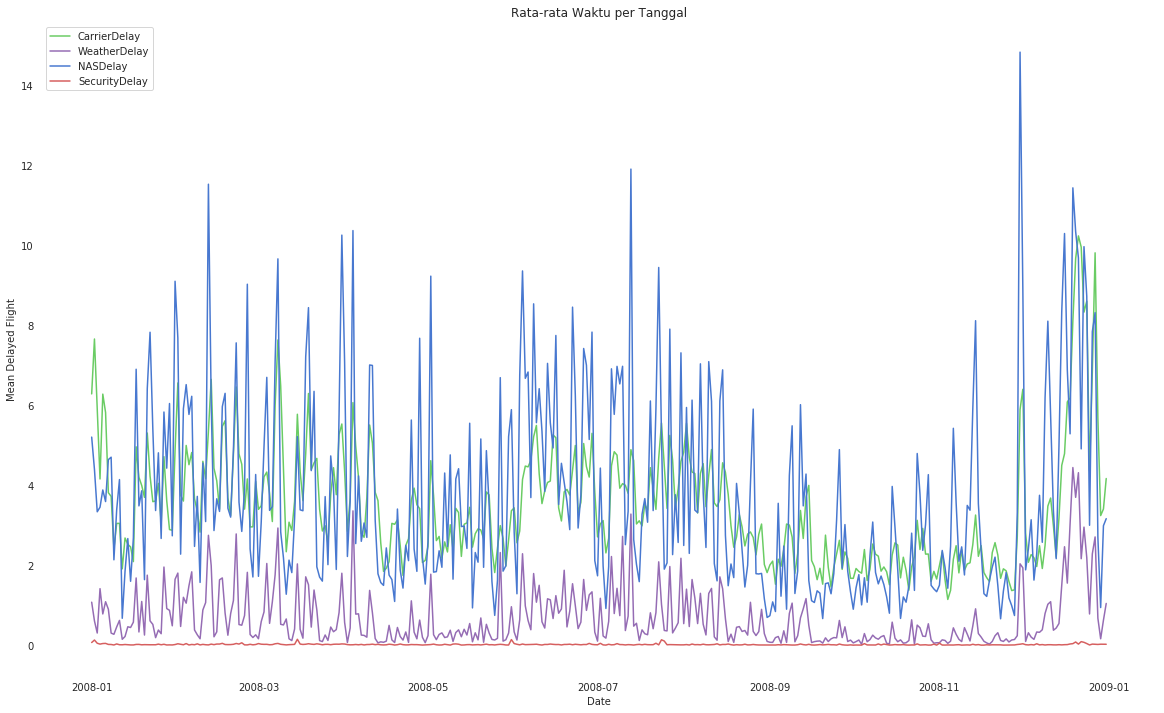

In [17]:
mean_delayed_by_carrier = flight_success.groupby('Date')[['CarrierDelay']].mean()
mean_delayed_by_weather = flight_success.groupby('Date')[['WeatherDelay']].mean()
mean_delayed_by_nas = flight_success.groupby('Date')[['NASDelay']].mean()
mean_delayed_by_security = flight_success.groupby('Date')[['SecurityDelay']].mean()

mean_delayed_flights = pd.merge(mean_delayed_by_weather, mean_delayed_by_carrier, on='Date')\
                         .merge(mean_delayed_by_nas, on='Date')\
                         .merge(mean_delayed_by_security, on='Date')

sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 12))

# Plot the CarrierDelay
sns.set_color_codes("muted")
sns.lineplot(x=mean_delayed_flights.index.tolist(),
            y=mean_delayed_flights['CarrierDelay'],
            data=mean_delayed_flights,
            label="CarrierDelay",
            color="g")

# Plot the WeatherDelay
sns.set_color_codes("muted")
sns.lineplot(x=mean_delayed_flights.index.tolist(),
            y=mean_delayed_flights['WeatherDelay'],
            data=mean_delayed_flights,
            label="WeatherDelay",
            color="m")

# Plot the NASDelay
sns.set_color_codes("muted")
sns.lineplot(x=mean_delayed_flights.index.tolist(),
            y=mean_delayed_flights['NASDelay'],
            data=mean_delayed_flights,
            label="NASDelay",
            color="b")

# Plot the SecurityDelay
sns.set_color_codes("muted")
sns.lineplot(x=mean_delayed_flights.index.tolist(),
            y=mean_delayed_flights['SecurityDelay'],
            data=mean_delayed_flights,
            label="SecurityDelay",
            color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlabel='Date', ylabel='Mean Delayed Flight', title='Rata-rata Waktu per Tanggal')
sns.despine(left=True, bottom=True)

# K-Means Clustering

K-means merupakan salah satu algoritma clustering. Tujuan algoritma ini yaitu untuk membagi data menjadi beberapa kelompok. Algoritma ini menerima masukan berupa data tanpa label kelas. Hal ini berbeda dengan supervised learning yang menerima masukan berupa vektor (­x­1 , y1) , (­x­2 , y2) , …, (­x­i , yi), di mana xi merupakan data dari suatu data pelatihan dan yi merupakan label kelas untuk xi.

Pada algoritma pembelajaran ini, komputer mengelompokkan sendiri data-data yang menjadi masukannya tanpa mengetahui terlebih dulu target kelasnya. Pembelajaran ini termasuk dalam unsupervised learning. Masukan yang diterima adalah data atau objek dan k buah kelompok (cluster) yang diinginkan.  Algoritma ini akan mengelompokkan data atau objek ke dalam k buah kelompok tersebut. Pada setiap cluster terdapat titik pusat (centroid) yang merepresentasikan cluster tersebut.

- X. Wu and V. Kumar, eds., The Top Ten Algorithms in Data Mining.Chapman and Hall, 2009.

- S. Russell  and P. Norvig, Artificial Intelligence A Modern Approach. Upper Saddle River, New Jersey 07458: Pearson Education, Inc., 3 ed., 2010.

Text(0, 0.5, 'Distance in Miles')

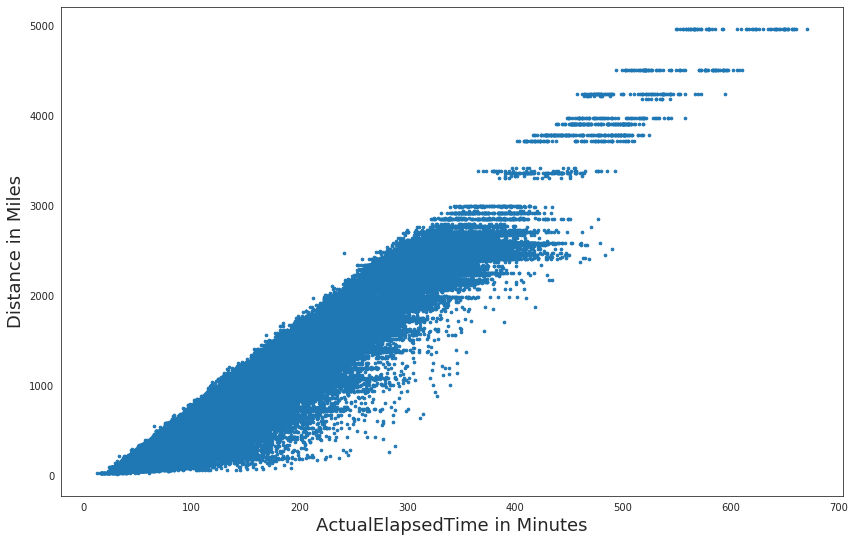

In [18]:
y = flight_success[flight_success['Date'].isin(pd.date_range('2008-10-28', '2008-12-01'))]

x = y[['ActualElapsedTime', 'Distance']].fillna(0).values

fig= plt.figure(figsize=(14,9))
plt.scatter(y['ActualElapsedTime'], y['Distance'], s=7)
plt.xlabel('ActualElapsedTime in Minutes', fontsize=18)
plt.ylabel('Distance in Miles', fontsize=18)

Sebelum saya implementasi K-Means Clustering, saya akan men-define sebuah dataframe dengan tanggal tertentu(untuk efisiensi memory device) yg berisi `ActualElapsedTime` dan `Distance`. Dua variabel tersebutlah yg akan digunakan. 

Pertama, kita akan implement K-Means Clustering dengan `k=5`. Inisialisasi ke variabel `kmeans`

In [19]:
from sklearn.cluster import KMeans

kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)

display(y_kmeans5)
display(kmeans5.cluster_centers_)

array([0, 2, 2, ..., 2, 3, 2], dtype=int32)

array([[  70.46246887,  273.46619802],
       [ 159.36397333,  995.57323597],
       [ 232.10701782, 1612.08036663],
       [ 112.87921255,  601.09201882],
       [ 327.26000926, 2429.00466713]])

Lalu saya akan perform Elbow Method dan visualisasi grafiknya untuk menentukan jumlah cluster yg paling tepat untuk pemodelan K-Means.

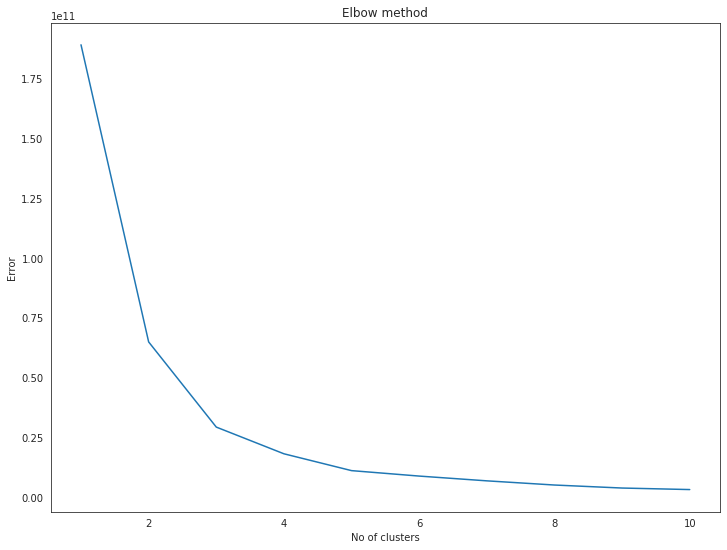

In [20]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,9))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Sudut yg paling mencolok adalah antara jumlah cluster 2 dan 4. Jadi bisa disimpulkan bahwa jumlah `k=3` adalah yg paling optimal.

Saya akan implement `k-Means` lagi dengan `k=3`

In [21]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)

display(y_kmeans3)
display(kmeans3.cluster_centers_)

array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

array([[  83.12269145,  372.159267  ],
       [ 157.03801011,  970.41065413],
       [ 280.0656476 , 2024.33803241]])

### Visualizing Clustering

Text(0, 0.5, 'Distance in Miles')

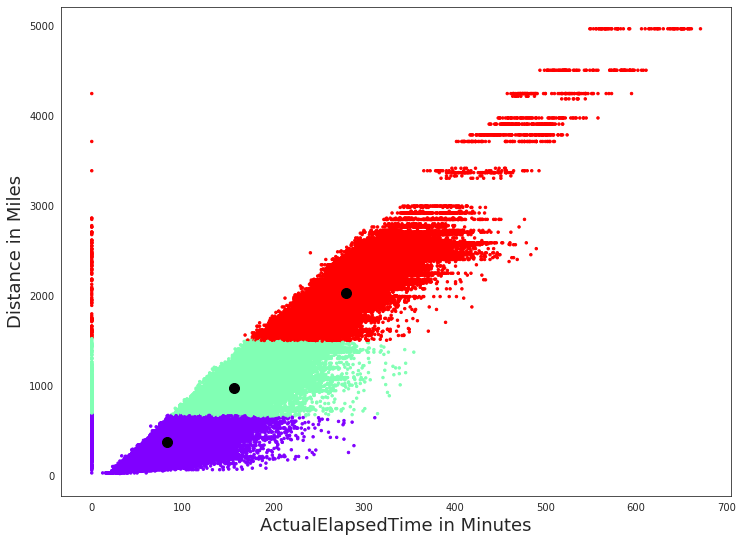

In [22]:
fig= plt.figure(figsize=(12,9))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=6, cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, c='black')
plt.xlabel('ActualElapsedTime in Minutes', fontsize=18)
plt.ylabel('Distance in Miles', fontsize=18)

### Tiga Cluster telah tervisualisasi dengan masing-masing warna. Warna hitam adalah Centroid dari masing-masing Clusters.

Next, we write a small helper function to calculate the Euclidean distances                   between the data points and centroids.

## Reference

-  https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
-  https://github.com/ParveenDala/flight-data-analysis/blob/master/Flight_Data_Analysis.ipynb
-  https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
-  X. Wu and V. Kumar, eds., The Top Ten Algorithms in Data Mining.Chapman and Hall, 2009.
-  S. Russell and P. Norvig, Artificial Intelligence A Modern Approach. Upper Saddle River, New Jersey 07458: Pearson Education, Inc., 3 ed., 2010.